<a href="https://colab.research.google.com/github/JulianSantos-LATAMAI/Latam_Macro_Data/blob/main/Chile_FDI_Growth_vs_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import wbgapi as wb
import pandas as pd

country_codes = ['CHL', 'HIC', 'WLD']
indicators = {
    'NY.GDP.MKTP.KD.ZG': 'GDP_Growth',
    'BX.KLT.DINV.CD.WD': 'Foreign_Direct_Investment'
}

data = wb.data.DataFrame(indicators.keys(), country_codes,
                         time=range(2000, 2024))

data = data.rename(index=indicators, level='series')

data = data.T

data.index = data.index.str.replace('YR', '').astype(int)
data.index.name = 'Year'


fdi_growth_df = pd.DataFrame(index=data.index, columns=pd.MultiIndex.from_product([country_codes, ['FDI_Growth']], names=['economy', 'series']))

for country in country_codes:
    fdi_series = data[(country, 'Foreign_Direct_Investment')]
    fdi_growth = fdi_series.pct_change() * 100
    fdi_growth_df[(country, 'FDI_Growth')] = fdi_growth

data = pd.concat([data, fdi_growth_df], axis=1)


data = data.sort_index(axis=1, level=[0, 1])


In [33]:
print (df_chl)


series  Foreign_Direct_Investment  GDP_Growth
Year                                         
2015                 1.776629e+10    2.151942
2016                 1.136283e+10    1.753039
2017                 5.237184e+09    1.357695
2018                 7.942632e+09    3.990029
2019                 1.357909e+10    0.634368
2020                 1.144740e+10   -6.143475
2021                 1.517690e+10   11.314920
2022                 1.877199e+10    2.153994
2023                 1.837736e+10    0.521368
2024                 1.252139e+10    2.644312


In [34]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt

country_codes = ['CHL', 'HIC', 'WLD']
indicators = {
    'NY.GDP.MKTP.KD.ZG': 'GDP_Growth',
    'BX.KLT.DINV.CD.WD': 'Foreign_Direct_Investment'
}

df = wb.data.DataFrame(indicators.keys(), country_codes,
                         time=range(2000, 2024))

df = df.rename(index=indicators, level='series')
df = df.T
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'

fdi_growth_df = pd.DataFrame(index=df.index, columns=pd.MultiIndex.from_product([country_codes, ['FDI_Growth']], names=['economy', 'series']))

for country in country_codes:
    fdi_series = df[(country, 'Foreign_Direct_Investment')]
    fdi_growth = fdi_series.pct_change() * 100
    fdi_growth_df[(country, 'FDI_Growth')] = fdi_growth

df = pd.concat([df, fdi_growth_df], axis=1)
df = df.sort_index(axis=1, level=[0, 1])



In [35]:
def_chl

series,Foreign_Direct_Investment,GDP_Growth
Year,,
2000,4.860016e+09,4.971621
2001,4.199763e+09,3.154035
2002,2.549923e+09,3.202799
2003,3.485728e+09,4.723245
2004,4.968731e+09,6.674254
2005,5.990832e+09,5.837046
2006,4.755333e+09,6.049991
2007,1.054522e+10,5.168231
2008,1.881178e+10,3.789393


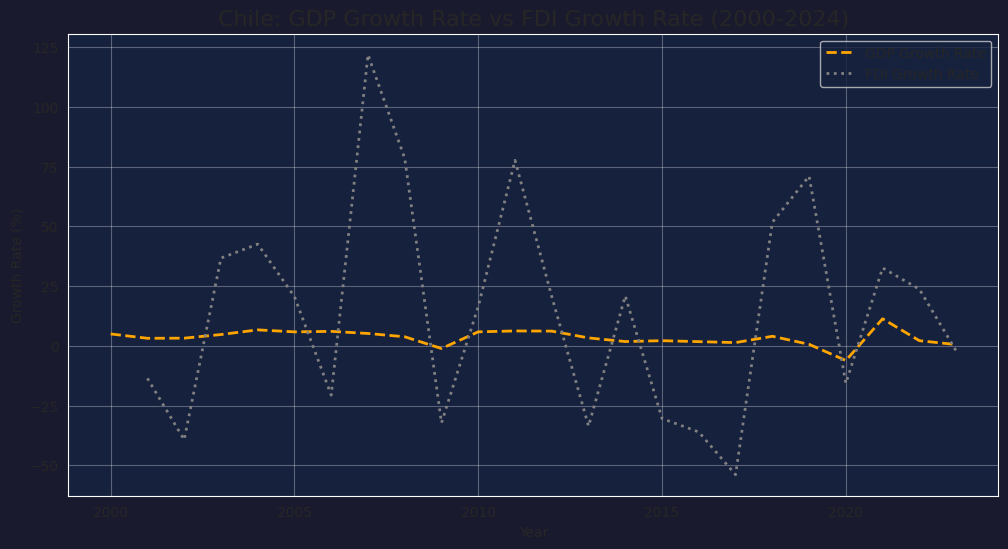

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHL', 'GDP_Growth')], label='GDP Growth Rate', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('CHL', 'FDI_Growth')], label='FDI Growth Rate', color='grey', linestyle=':', linewidth=2)

plt.title("Chile: GDP Growth Rate vs FDI Growth Rate (2000-2024)", fontsize=16)
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

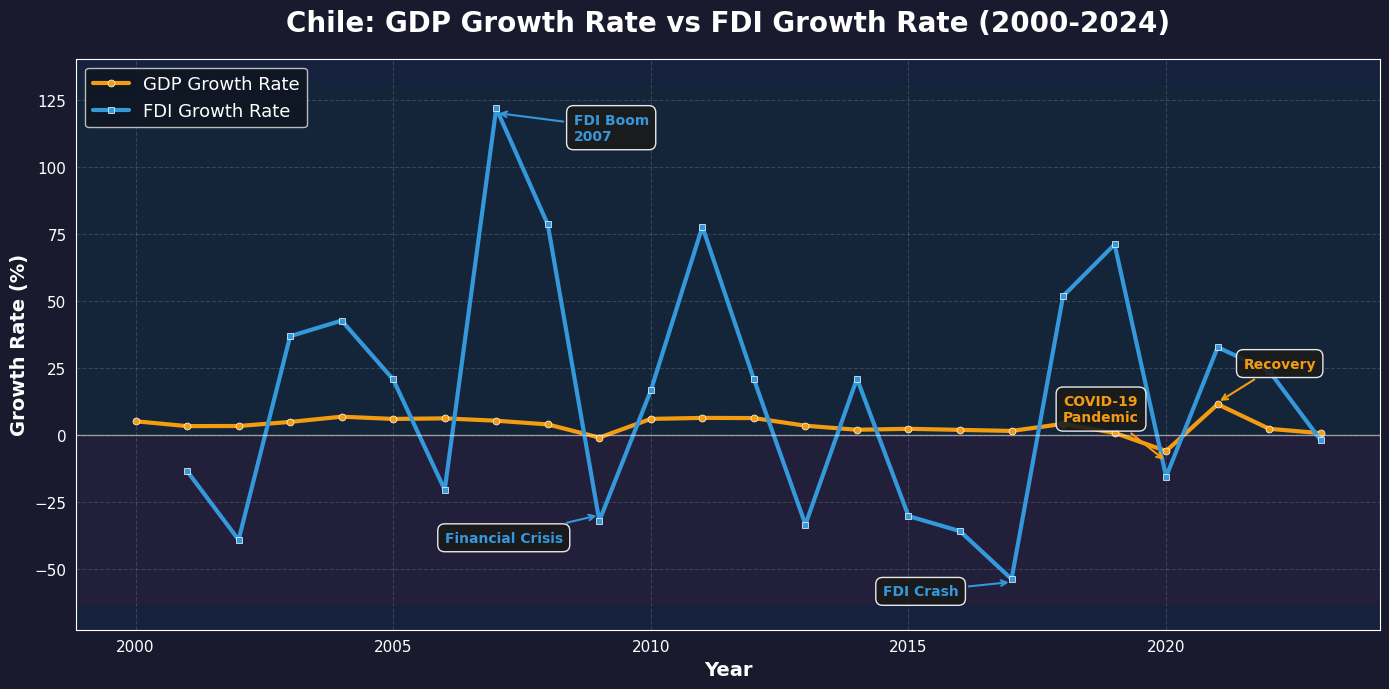

In [43]:
# Alternative: Seaborn dark style
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1a1a2e'
plt.rcParams['axes.facecolor'] = '#16213e'

fig, ax = plt.subplots(figsize=(14, 7))

# Plot with glow effect
ax.plot(df.index, df[('CHL', 'GDP_Growth')],
        label='GDP Growth Rate',
        color='#f39c12',
        linewidth=3,
        marker='o',
        markersize=5,
        markeredgecolor='white',
        markeredgewidth=0.5)

ax.plot(df.index, df[('CHL', 'FDI_Growth')],
        label='FDI Growth Rate',
        color='#3498db',
        linewidth=3,
        marker='s',
        markersize=5,
        markeredgecolor='white',
        markeredgewidth=0.5)

ax.axhspan(0, ax.get_ylim()[1], alpha=0.05, color='green')
ax.axhspan(ax.get_ylim()[0], 0, alpha=0.05, color='red')

ax.axhline(y=0, color='white', linestyle='-', linewidth=1, alpha=0.5)

ax.annotate('FDI Boom\n2007',
            xy=(2007, 120),
            xytext=(2008.5, 110),
            fontsize=10,
            color='#3498db',
            fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='#3498db', lw=1.5),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#1a1a1a', alpha=0.9))

ax.annotate('Financial Crisis',
            xy=(2009, -30),
            xytext=(2006, -40),
            fontsize=10,
            color='#3498db',
            fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='#3498db', lw=1.5),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#1a1a1a', alpha=0.9))

ax.annotate('FDI Crash',
            xy=(2017, -55),
            xytext=(2014.5, -60),
            fontsize=10,
            color='#3498db',
            fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='#3498db', lw=1.5),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#1a1a1a', alpha=0.9))

ax.annotate('COVID-19\nPandemic',
            xy=(2020, -10),
            xytext=(2018, 5),
            fontsize=10,
            color='#f39c12',
            fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='#f39c12', lw=1.5),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#1a1a1a', alpha=0.9))

ax.annotate('Recovery',
            xy=(2021, 12),
            xytext=(2021.5, 25),
            fontsize=10,
            color='#f39c12',
            fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='#f39c12', lw=1.5),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#1a1a1a', alpha=0.9))

ax.set_title("Chile: GDP Growth Rate vs FDI Growth Rate (2000-2024)",
             fontsize=20,
             fontweight='bold',
             color='white',
             pad=20)
ax.set_xlabel('Year', fontsize=14, fontweight='bold', color='white')
ax.set_ylabel('Growth Rate (%)', fontsize=14, fontweight='bold', color='white')

ax.grid(True, alpha=0.15, color='white', linestyle='--')
legend = ax.legend(fontsize=13, loc='upper left', framealpha=0.9)
legend.get_frame().set_facecolor('#0e1621')
for text in legend.get_texts():
    text.set_color('white')
ax.tick_params(colors='white', labelsize=11)

plt.tight_layout()
plt.show()